In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop(columns=["User ID", "Gender"], inplace=True)

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
df.shape

(400, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


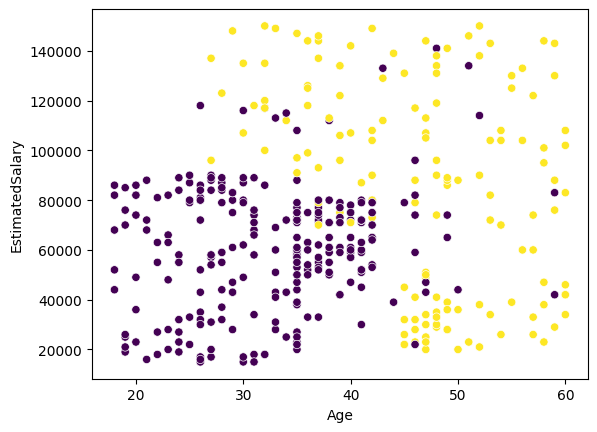

In [11]:
sns.scatterplot(x= df["Age"], y=df["EstimatedSalary"], data=df, c=df["Purchased"])
plt.show()

In [12]:
df.iloc[:,:2]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [13]:
df.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:2], df.iloc[:,-1], test_size=0.2, random_state=2)

In [15]:
import torch
from torch import nn

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [22]:
class model_before_data_scaling(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=2, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=1),
        nn.Sigmoid())

    def forward(self, x):
        return self.linear_layer_stack(x)

model = model_before_data_scaling().to(device)

In [23]:
model

model_before_data_scaling(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
    (3): Sigmoid()
  )
)

In [24]:
model.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.6810,  0.2862],
                      [ 0.2754,  0.1780],
                      [-0.6488, -0.6288],
                      [-0.4190,  0.1620],
                      [ 0.4526,  0.4799],
                      [-0.1640,  0.4480],
                      [-0.4833, -0.2181],
                      [ 0.5564,  0.6605],
                      [ 0.0092, -0.3507],
                      [-0.5931,  0.1956],
                      [ 0.1798, -0.0775],
                      [-0.1108,  0.0976],
                      [-0.1829,  0.5778],
                      [-0.4747, -0.6454],
                      [-0.4275,  0.1246],
                      [-0.7071,  0.1976],
                      [-0.3867,  0.5840],
                      [ 0.1622,  0.4249],
                      [-0.6445,  0.1937],
                      [ 0.4723, -0.1416],
                      [-0.2725, -0.5293],
                      [-0.5176, -0.1865],
                      [-0.3467,

In [25]:
total_params = sum(
	param.numel() for param in model.parameters()
)
total_params

513

In [26]:
# loss_fc and optimizer
loss_fc = nn.BCELoss() 

optimizer = torch.optim.Adam(params = model.parameters(),
                            lr = 0.001)

In [28]:
# turn data into tensors
X_train_tensor = torch.from_numpy(X_train.values).type(torch.float)
y_train_tensor = torch.from_numpy(y_train.values).type(torch.float)

X_test_tensor = torch.from_numpy(X_test.values).type(torch.float)
y_test_tensor = torch.from_numpy(y_test.values).type(torch.float)

In [29]:
X_train_tensor

tensor([[4.7000e+01, 4.7000e+04],
        [3.6000e+01, 9.9000e+04],
        [2.7000e+01, 5.7000e+04],
        [4.8000e+01, 9.0000e+04],
        [2.8000e+01, 8.9000e+04],
        [4.2000e+01, 7.0000e+04],
        [4.8000e+01, 1.4100e+05],
        [4.1000e+01, 5.9000e+04],
        [5.6000e+01, 6.0000e+04],
        [3.6000e+01, 1.4400e+05],
        [5.6000e+01, 1.0400e+05],
        [2.4000e+01, 1.9000e+04],
        [5.9000e+01, 8.8000e+04],
        [5.1000e+01, 1.3400e+05],
        [2.6000e+01, 8.0000e+04],
        [3.4000e+01, 4.3000e+04],
        [2.0000e+01, 8.6000e+04],
        [3.2000e+01, 1.8000e+04],
        [4.1000e+01, 4.5000e+04],
        [3.8000e+01, 5.0000e+04],
        [3.8000e+01, 7.1000e+04],
        [3.7000e+01, 5.2000e+04],
        [3.1000e+01, 1.8000e+04],
        [3.8000e+01, 8.0000e+04],
        [4.1000e+01, 7.2000e+04],
        [3.3000e+01, 3.1000e+04],
        [3.0000e+01, 1.7000e+04],
        [3.5000e+01, 4.7000e+04],
        [2.6000e+01, 8.6000e+04],
        [3.700

In [37]:
epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  model.train()

  # forward pass
  y_logits = model(X_train_tensor).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss/accuarcy
  loss = loss_fc(y_logits, y_train_tensor)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step (perform gradient descent)
  optimizer.step()

  # testing
  model.eval()
  with torch.inference_mode():

    # forward pass
    test_logits = model(X_test_tensor).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss/accuarcy
    test_loss = loss_fc(test_logits, y_test_tensor)


# lets print out what is happening
    if epoch % 5 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss} | Val_Loss: {test_loss}")

Epoch: 0 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 5 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 10 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 15 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 20 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 25 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 30 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 35 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 40 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 45 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 50 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 55 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 60 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 65 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 70 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 75 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 80 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 85 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 90 | Loss: 65.3125 | Val_Loss: 60.0
Epoch: 95 | Loss: 65.3125 | Val_Loss: 60.0


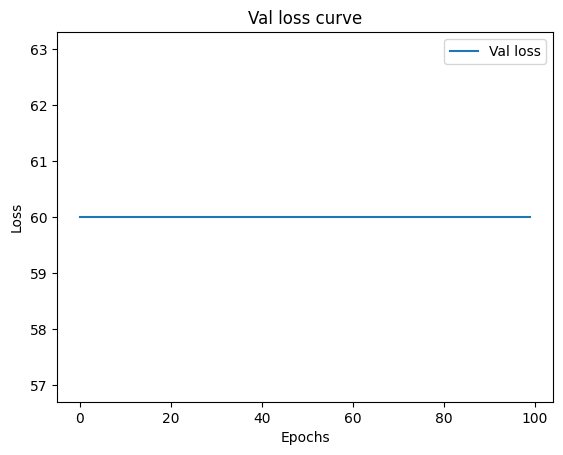

In [36]:
# Plot the loss curves
plt.plot(epoch_count, test_loss_values, label="Val loss")
plt.title("Val loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [38]:
# Applying the scaling

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
X_train_scaled = scaler.fit_transform(X_train_tensor)
X_test_scaled = scaler.transform(X_test_tensor)

In [44]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

In [47]:
X_train_scaled[:,1]

array([-0.65924556,  0.87392651, -0.36440478,  0.6085698 ,  0.57908572,
        0.01888824,  2.11225779, -0.30543662, -0.27595254,  2.20071003,
        1.0213469 , -1.48479975,  0.54960165,  1.90586924,  0.31372902,
       -0.77718187,  0.49063349, -1.51428383, -0.71821372, -0.57079333,
        0.04837232, -0.51182517, -1.51428383,  0.31372902,  0.07785639,
       -1.13099081, -1.54376791, -0.65924556,  0.49063349,  2.20071003,
        0.04837232, -1.57325199,  0.54960165, -1.24892713, -0.92460227,
       -1.21944305, -0.95408634, -0.65924556, -0.57079333,  0.31372902,
       -0.24646847, -1.39634752, -0.36440478,  1.2867036 , -0.18750031,
       -0.57079333, -1.39634752, -1.04253858,  0.13682455, -0.65924556,
        0.01888824,  0.10734047, -0.30543662,  0.28424494,  0.04837232,
        2.20071003, -1.45531567,  0.31372902, -1.18995897, -0.51182517,
        0.16630863, -0.92460227,  0.04837232,  0.07785639, -0.12853215,
       -1.10150673,  2.25967818, -0.12853215,  1.05083098,  0.28

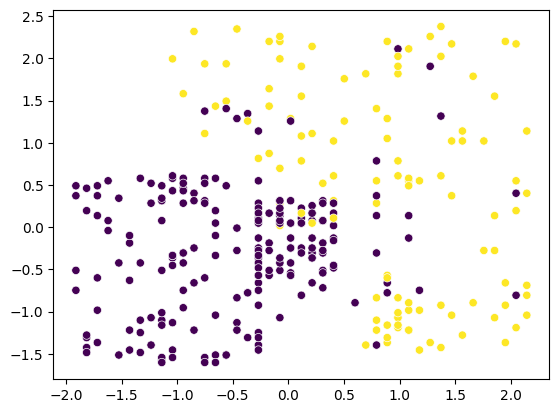

In [53]:
sns.scatterplot(x= X_train_scaled[:,0], y=X_train_scaled[:,1], c = y_train)
plt.show()

In [55]:
X_train_ten = torch.from_numpy(X_train_scaled).type(torch.float)
X_test_ten = torch.from_numpy(X_test_scaled).type(torch.float)

In [56]:
epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  model.train()

  # forward pass
  y_logits = model(X_train_ten).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss/accuarcy
  loss = loss_fc(y_logits, y_train_tensor)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step (perform gradient descent)
  optimizer.step()

  # testing
  model.eval()
  with torch.inference_mode():

    # forward pass
    test_logits = model(X_test_ten).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss/accuarcy
    test_loss = loss_fc(test_logits, y_test_tensor)


# lets print out what is happening
    if epoch % 5 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss} | Val_Loss: {test_loss}")

Epoch: 0 | Loss: 0.703876793384552 | Val_Loss: 0.6677240133285522
Epoch: 5 | Loss: 0.540062665939331 | Val_Loss: 0.5040497779846191
Epoch: 10 | Loss: 0.4217928349971771 | Val_Loss: 0.40153226256370544
Epoch: 15 | Loss: 0.3538963496685028 | Val_Loss: 0.3404728174209595
Epoch: 20 | Loss: 0.3162252604961395 | Val_Loss: 0.30732911825180054
Epoch: 25 | Loss: 0.2931308150291443 | Val_Loss: 0.29105356335639954
Epoch: 30 | Loss: 0.27735841274261475 | Val_Loss: 0.2830163836479187
Epoch: 35 | Loss: 0.26684266328811646 | Val_Loss: 0.2768087685108185
Epoch: 40 | Loss: 0.2595880627632141 | Val_Loss: 0.2697092890739441
Epoch: 45 | Loss: 0.254573792219162 | Val_Loss: 0.26309487223625183
Epoch: 50 | Loss: 0.25095075368881226 | Val_Loss: 0.2585282027721405
Epoch: 55 | Loss: 0.24800042808055878 | Val_Loss: 0.2560197710990906
Epoch: 60 | Loss: 0.24548956751823425 | Val_Loss: 0.25451916456222534
Epoch: 65 | Loss: 0.24329426884651184 | Val_Loss: 0.25327613949775696
Epoch: 70 | Loss: 0.24127939343452454 | V